In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as ps
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart_dataset.csv')

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
print(df.columns)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [5]:
# Check Missing Values
Sum = df.isnull().sum()
Percentage = ( df.isnull().sum()/df.isnull().count())
pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
HeartDisease,0,0.0
BMI,0,0.0
Smoking,0,0.0
AlcoholDrinking,0,0.0
Stroke,0,0.0
PhysicalHealth,0,0.0
MentalHealth,0,0.0
DiffWalking,0,0.0
Sex,0,0.0
AgeCategory,0,0.0


In [6]:
print(f'Data Frame Shape (rows, columns): {df.shape}')

Data Frame Shape (rows, columns): (319795, 18)


In [7]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [9]:
df["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [10]:
df["Race"].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [11]:
df["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [12]:
# Encoding
df['HeartDisease'].replace({'No':0,'Yes':1}, inplace=True)
df['Smoking'].replace({'No':0,'Yes':1}, inplace=True)
df['AlcoholDrinking'].replace({'No':0,'Yes':1}, inplace=True)
df['Stroke'].replace({'No':0,'Yes':1}, inplace=True)
df['DiffWalking'].replace({'No':0,'Yes':1}, inplace=True)
df['Diabetic'].replace({'No':0,'No, borderline diabetes':0,'Yes (during pregnancy)':1,'Yes':1}, inplace=True)
df['PhysicalActivity'].replace({'No':0,'Yes':1}, inplace=True)
df['Asthma'].replace({'No':0,'Yes':1}, inplace=True)
df['KidneyDisease'].replace({'No':0,'Yes':1}, inplace=True)
df['SkinCancer'].replace({'No':0,'Yes':1}, inplace=True)
df['Sex'].replace({'Male':0,'Female':1}, inplace=True)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,40-44,White,0,1,Very good,8.0,0,0,0


In [13]:
# Encoding
df['AgeCategory'].replace({'18-24':0,'25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}, inplace=True)
df['Race'].replace({'White':0,'Hispanic':1,'Black':2,'Asian':3,'American Indian/Alaskan Native':4,'Other':5}, inplace=True)
df['GenHealth'].replace({'Excellent':0,'Very good':1,'Good':2,'Fair':3,'Poor':4}, inplace=True)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,0,1,1,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,12,0,0,1,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,0,1,1,3,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,4,0,0,1,1,8.0,0,0,0


In [14]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.524727,6.514536,0.540897,0.135590,0.775362,1.404972,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.192394,0.342353,0.417344,1.042918,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,1.000000,1.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,1.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


In [15]:
print('Minimum and Maximum value of BMI is:            ', df["BMI"].min(), 'and', df["BMI"].max())
print('Minimum and Maximum value of PhysicalHealth is: ', df["PhysicalHealth"].min(), 'and', df["PhysicalHealth"].max())
print('Minimum and Maximum value of MentalHealth is:   ', df["MentalHealth"].min(), 'and', df["MentalHealth"].max())
print('Minimum and Maximum value of SleepTime is:      ', df["SleepTime"].min(), 'and', df["SleepTime"].max())

Minimum and Maximum value of BMI is:             12.02 and 94.85
Minimum and Maximum value of PhysicalHealth is:  0.0 and 30.0
Minimum and Maximum value of MentalHealth is:    0.0 and 30.0
Minimum and Maximum value of SleepTime is:       1.0 and 24.0


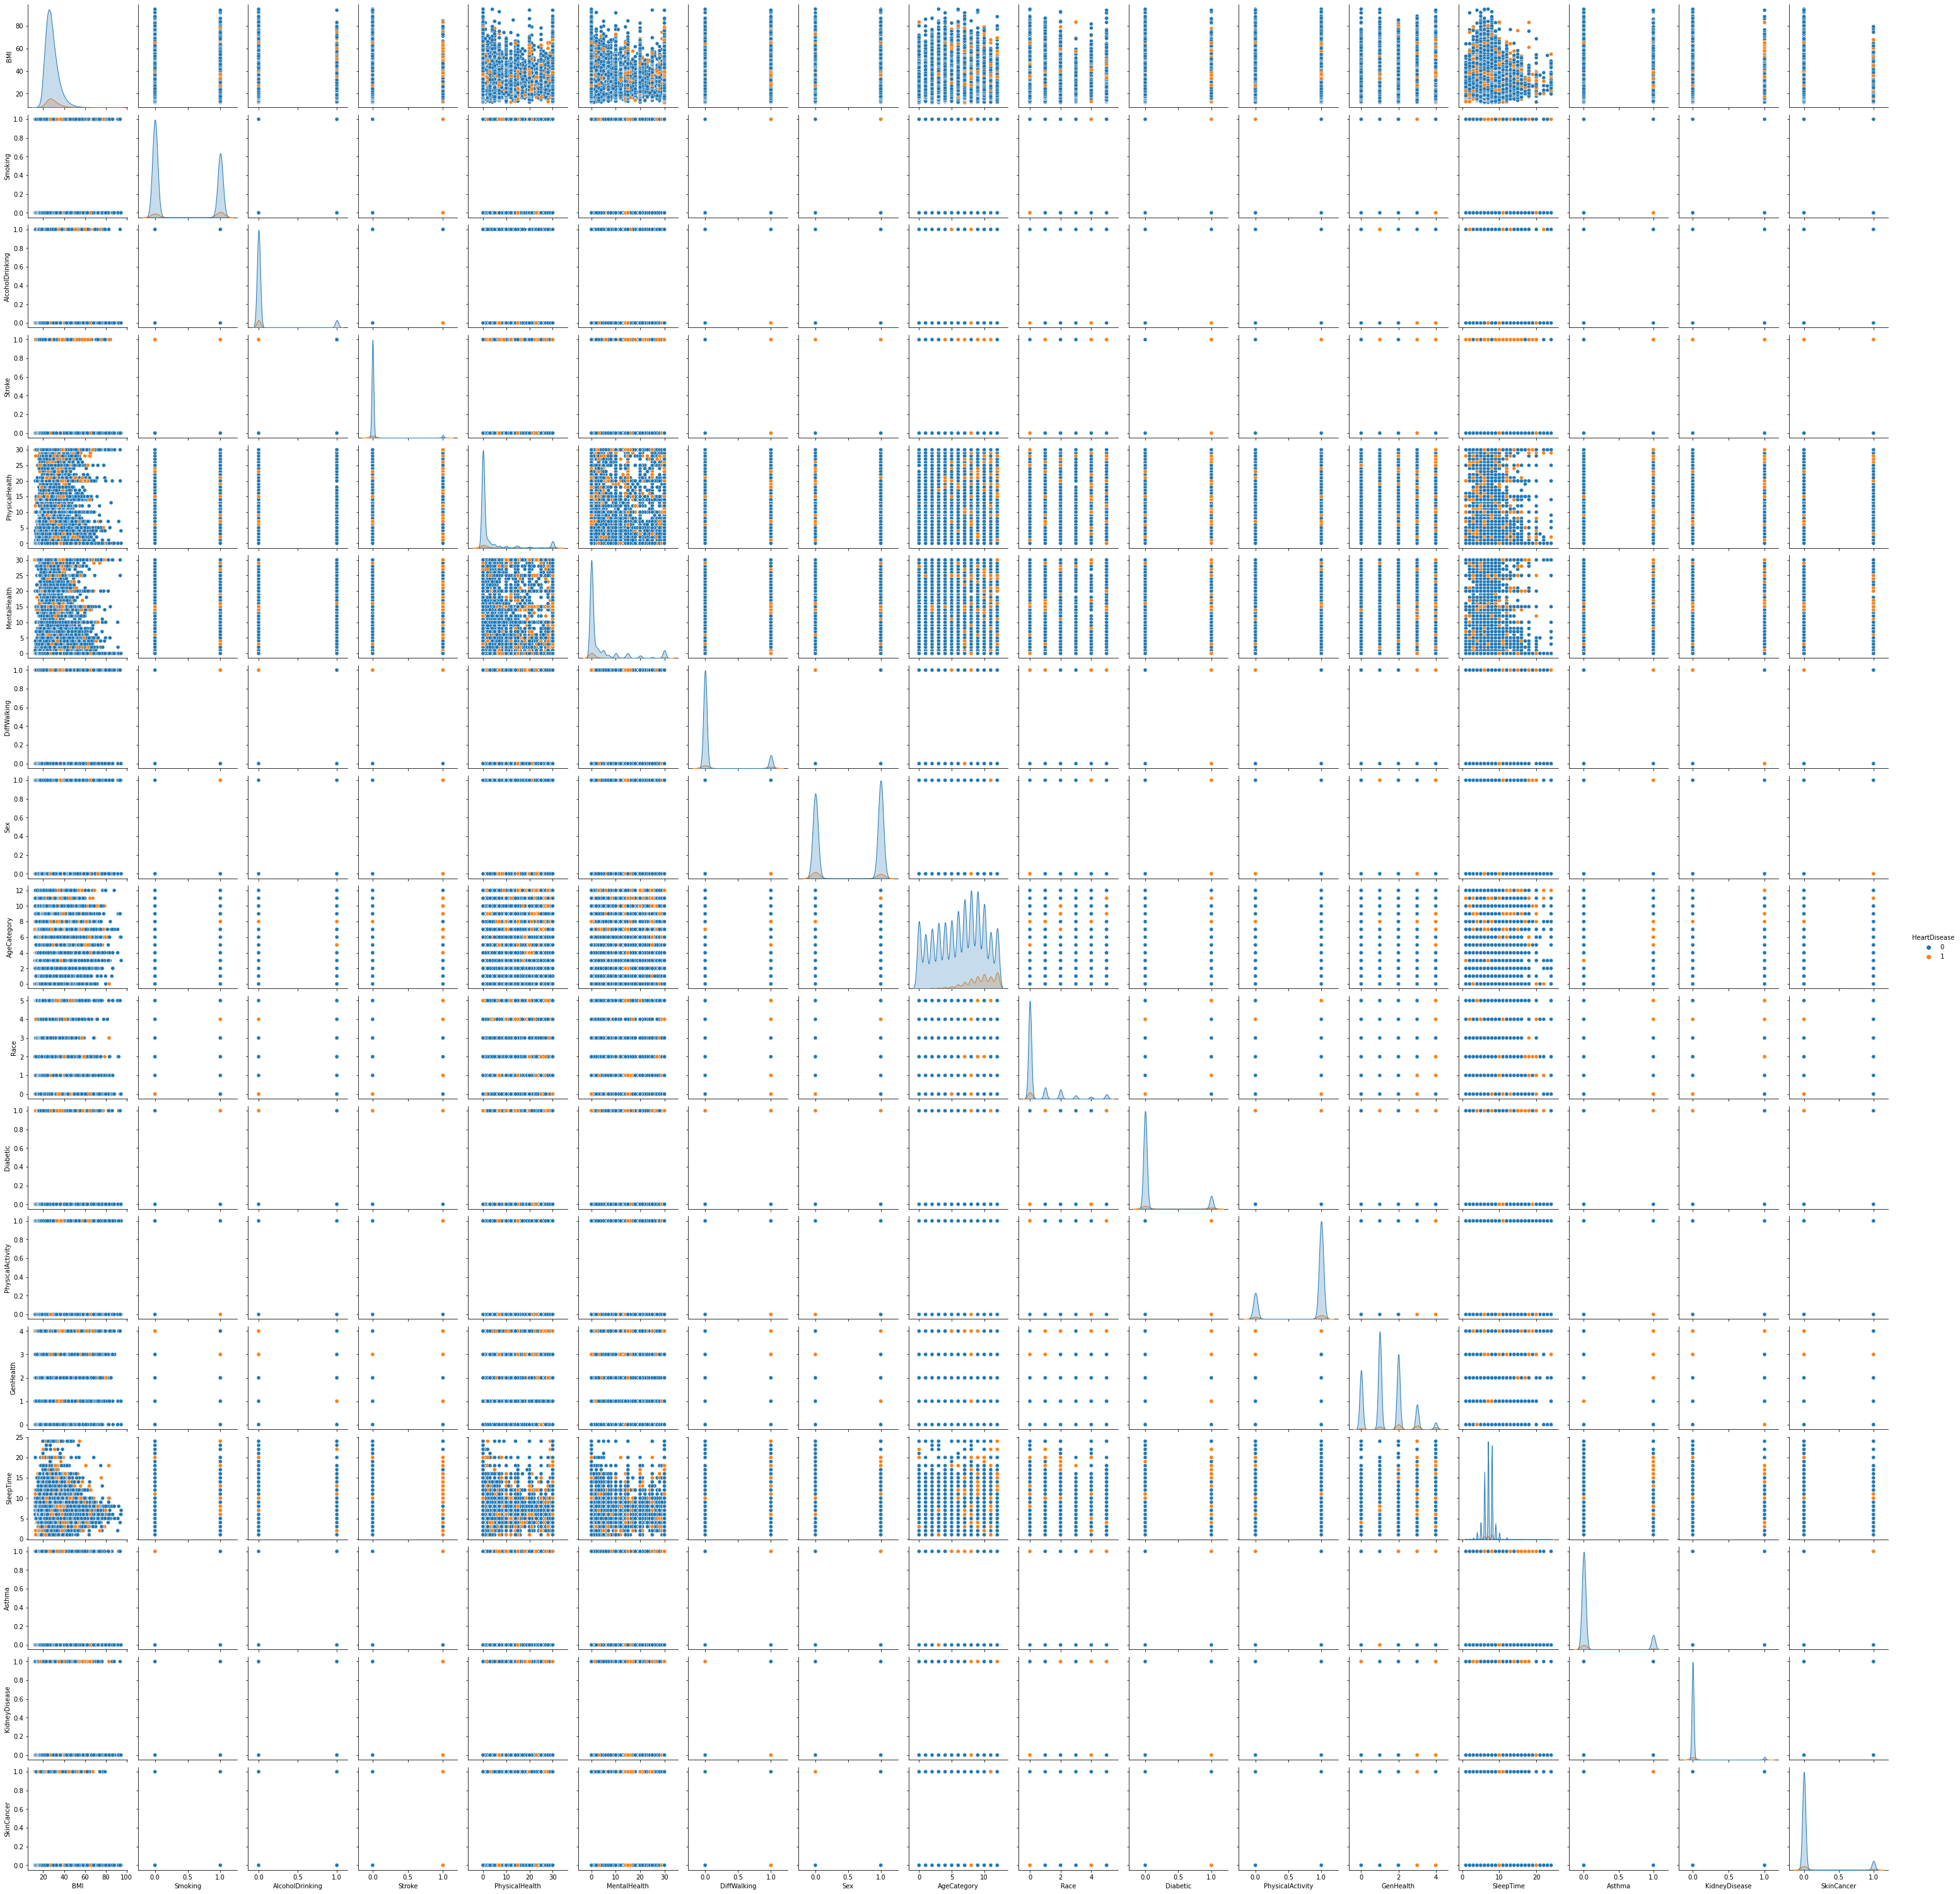

In [16]:
sns.pairplot(df, hue="HeartDisease")

Text(0.5, 1.0, 'Gender Count')

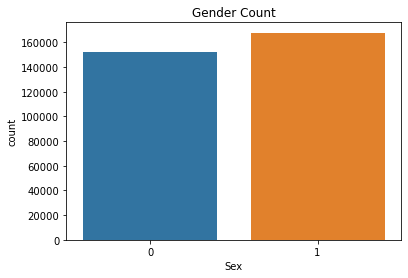

In [17]:
sns.countplot(data=df, x="Sex").set_title("Gender Count")

Text(0.5, 1.0, 'Target variable')

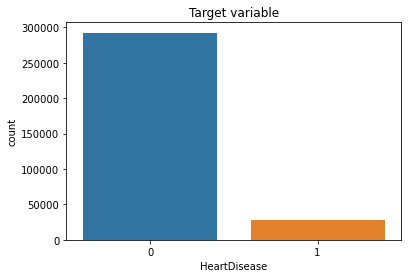

In [19]:
sns.countplot(data=df, x="HeartDisease").set_title("Target variable")

In [20]:
# Dataset is imbalanced. So, need to make it balance.
from sklearn.utils import resample
df_majority_0 = df[(df['HeartDisease']==0)] 
df_minority_1 = df[(df['HeartDisease']==1)] 
df_minority_upsampled = resample(df_minority_1, replace=True, n_samples= 292422, random_state=42) 
df_upsampled = pd.concat([df_minority_upsampled, df_majority_0])
df0 = df_upsampled
df0.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
276535,1,35.43,0,1,1,0.0,0.0,1,1,12,0,0,0,2,12.0,0,0,0
183941,1,23.06,0,0,0,0.0,0.0,0,0,12,0,1,1,3,8.0,0,0,0
8829,1,23.49,1,0,0,5.0,0.0,0,0,12,0,1,1,3,7.0,0,0,0
60254,1,26.63,1,0,0,4.0,3.0,1,1,12,0,1,1,3,10.0,0,0,0
251583,1,28.07,0,1,0,0.0,0.0,0,0,11,0,0,1,0,8.0,0,0,1


In [21]:
df0['HeartDisease'].value_counts()

1    292422
0    292422
Name: HeartDisease, dtype: int64

Text(0.5, 1.0, 'Target variable')

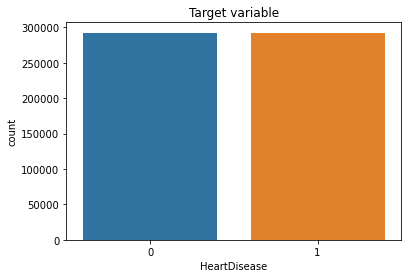

In [22]:
sns.countplot(data=df0, x="HeartDisease").set_title("Target variable")

Text(0, 0.5, 'correlation')

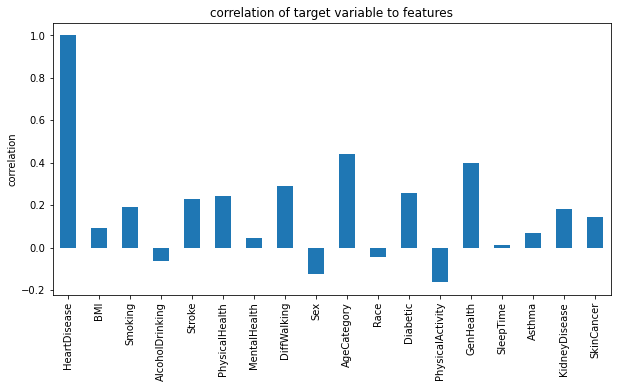

In [23]:
# Correlation
plt.figure(figsize=(10,5))
ax = df0.corr()['HeartDisease'].plot(kind='bar',title='correlation of target variable to features')
ax.set_ylabel('correlation')

<AxesSubplot:>

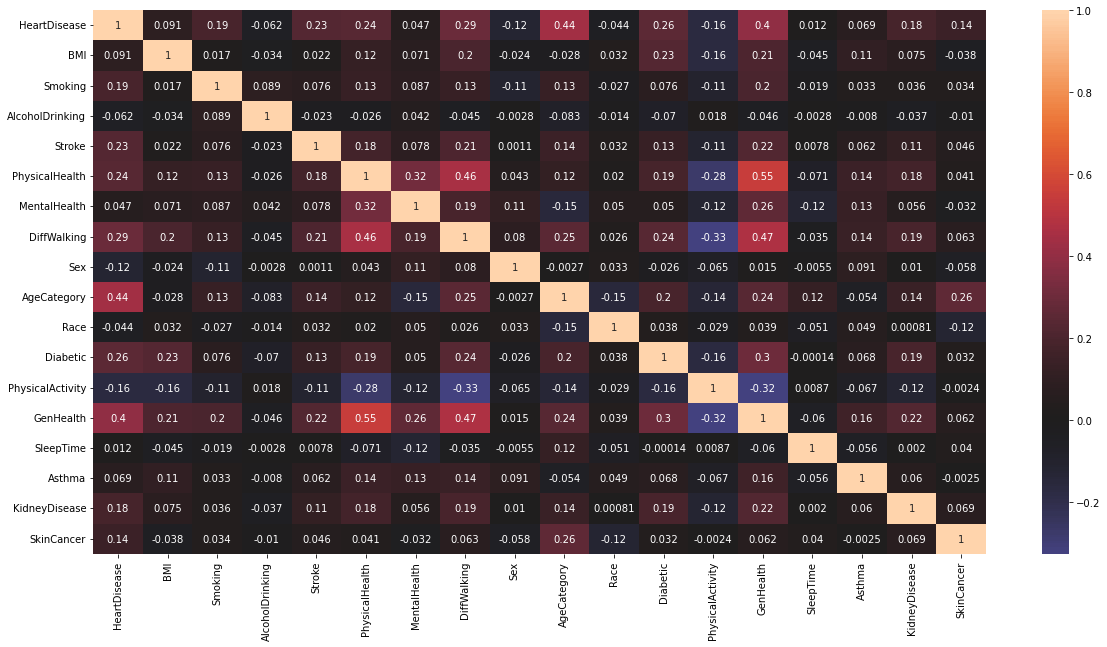

In [24]:
#Heatmap Correlation
cor = df0.corr()
plt.figure(figsize=(20,10))
sns.heatmap(data=cor, annot=True, center=0)

In [25]:
cor["HeartDisease"].sort_values(ascending=False)

HeartDisease        1.000000
AgeCategory         0.440073
GenHealth           0.396500
DiffWalking         0.290518
Diabetic            0.255955
PhysicalHealth      0.243089
Stroke              0.230961
Smoking             0.190185
KidneyDisease       0.183357
SkinCancer          0.142362
BMI                 0.090737
Asthma              0.068865
MentalHealth        0.046905
SleepTime           0.011960
Race               -0.044085
AlcoholDrinking    -0.061596
Sex                -0.123833
PhysicalActivity   -0.163939
Name: HeartDisease, dtype: float64

In [26]:
# Considering the correlation with the target variable I will drop 5 attributes 
# like Asthma, MentalHealth, SleepTime, Race, AlcoholDrinking and
# will consider remaining 12 attributes for model training.

In [27]:
# Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

df1= df0.drop(['Asthma', 'MentalHealth', 'SleepTime', 'Race', 'AlcoholDrinking'], axis=1)
Xl = df1.drop(['HeartDisease'], axis=1)
yl = df1['HeartDisease']
sc = StandardScaler()
Xl = sc.fit_transform(Xl)

Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl,yl, test_size=0.2, random_state=40)

In [28]:
log_reg = LogisticRegression()
log_reg.fit(Xl_train, yl_train)

LogisticRegression()

In [29]:
train_accuracy = log_reg.score(Xl_train, yl_train)
test_accuracy = log_reg.score(Xl_test, yl_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  set   : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy in Train set   : 0.76
Accuracy in Test  set   : 0.76


In [30]:
print('Logistic Regression Model Metrics:')
print('===================================')
yl_pred = log_reg.predict(Xl_test)
print('accuracy_score:  ', accuracy_score(y_pred=yl_pred,y_true=yl_test.values.ravel()))
print('precision_score: ', precision_score(y_pred=yl_pred,y_true=yl_test.values.ravel()))
print('recall:          ', recall_score(y_pred=yl_pred,y_true=yl_test.values.ravel()))
print('F1:              ', f1_score(y_pred=yl_pred,y_true=yl_test.values.ravel()))
print('AUC Score :      ', roc_auc_score(y_score=yl_pred,y_true=yl_test.values.ravel()))

Logistic Regression Model Metrics:
accuracy_score:   0.762236148039224
precision_score:  0.7548717948717949
recall:           0.7783710021321961
F1:               0.7664413184967458
AUC Score :       0.7621972931955373


In [31]:
print(classification_report(yl_test,yl_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     58344
           1       0.75      0.78      0.77     58625

    accuracy                           0.76    116969
   macro avg       0.76      0.76      0.76    116969
weighted avg       0.76      0.76      0.76    116969



Confusion Matrix for Logistic Regression Model


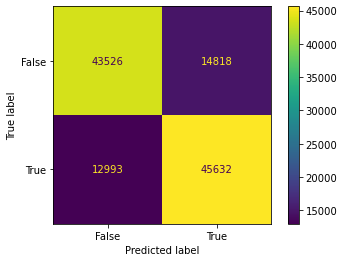

In [32]:
cfl = metrics.confusion_matrix(yl_test.values.ravel(), yl_pred.ravel())
cml_display = ConfusionMatrixDisplay(confusion_matrix = cfl, display_labels = [False, True])
print('Confusion Matrix for Logistic Regression Model')
cml_display.plot()
plt.show()

In [74]:
# logistic regression Hyperparameter Optimization using Grid search
log_reg_opt = LogisticRegression()

In [75]:
param_grid = [
    {
       'penalty' : ['l1', 'l2'],
        'C' : np.logspace(-4, 4, 20),
        'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
        'max_iter' : [100, 1000, 2500, 5000]
    }
]

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(log_reg_opt, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(Xl_train, yl_train)

Fitting 3 folds for each of 800 candidates, totalling 2400 fits


In [77]:
best_clf.best_estimator_

NameError: name 'best_clf' is not defined

In [ ]:
train_accuracy = best_clf.score(Xl_train, yl_train)
test_accuracy = best_clf.score(Xl_test, yl_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  set   : {:.2f}'.format(test_accuracy), sep='\n')

In [40]:
# Decicion Tree
from sklearn.tree import DecisionTreeClassifier

df2= df0.drop(['Asthma', 'MentalHealth', 'SleepTime', 'Race', 'AlcoholDrinking'], axis=1)
Xd = df2.drop(['HeartDisease'], axis=1)
yd = df2['HeartDisease']
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd,yd, test_size=0.2, random_state=42)

In [42]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(Xd_train,yd_train)

DecisionTreeClassifier()

In [43]:
train_accuracy = dec_tree.score(Xd_train, yd_train)
test_accuracy = dec_tree.score(Xd_test, yd_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  set   : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy in Train set   : 0.98
Accuracy in Test  set   : 0.94


In [44]:
print('Decision Tree Model Metrics:')
print('==============================')
yd_pred = dec_tree.predict(Xd_test)
print('accuracy_score:  ', accuracy_score(y_pred=yd_pred,y_true=yd_test.values.ravel()))
print('precision_score: ', precision_score(y_pred=yd_pred,y_true=yd_test.values.ravel()))
print('recall:          ', recall_score(y_pred=yd_pred,y_true=yd_test.values.ravel()))
print('F1:              ', f1_score(y_pred=yd_pred,y_true=yd_test.values.ravel()))
print('AUC Score :      ', roc_auc_score(y_score=yd_pred,y_true=yd_test.values.ravel()))

Decision Tree Model Metrics:
accuracy_score:   0.9382143986868315
precision_score:  0.8989517232798308
recall:           0.9875275504450786
F1:               0.9411601872582943
AUC Score :       0.9381768484600478


In [45]:
print(classification_report(yd_test,yd_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.93     58440
           1       0.90      0.99      0.94     58529

    accuracy                           0.94    116969
   macro avg       0.94      0.94      0.94    116969
weighted avg       0.94      0.94      0.94    116969



Confusion Matrix for Decision Tree Model


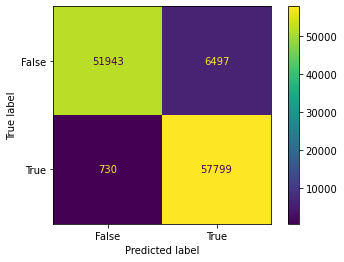

In [46]:
cfd = metrics.confusion_matrix(yd_test.values.ravel(), yd_pred.ravel())
cmd_display = ConfusionMatrixDisplay(confusion_matrix = cfd, display_labels = [False, True])
print('Confusion Matrix for Decision Tree Model')
cmd_display.plot()
plt.show()

In [47]:
# Optimize the decision tree depth
dec_tree.tree_.max_depth

48

In [48]:
training_score = []
testing_score = []
for max_d in range(1,80):
    dec_tree = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    dec_tree.fit(Xd_train, yd_train)
    print('The Training Accuracy for max_depth {} is:'.format(max_d), dec_tree.score(Xd_train, yd_train))
    print('The Testing Accuracy for max_depth {} is:'.format(max_d), dec_tree.score(Xd_test,yd_test))
    training_score.append(dec_tree.score(Xd_train, yd_train))
    testing_score.append(dec_tree.score(Xd_test,yd_test))
print('')

The Training Accuracy for max_depth 1 is: 0.680769436281058
The Testing Accuracy for max_depth 1 is: 0.6804965418187725
The Training Accuracy for max_depth 2 is: 0.7159091637723751
The Testing Accuracy for max_depth 2 is: 0.7187117954329779
The Training Accuracy for max_depth 3 is: 0.7365257814587229
The Testing Accuracy for max_depth 3 is: 0.738486265591738
The Training Accuracy for max_depth 4 is: 0.7452075874966604
The Testing Accuracy for max_depth 4 is: 0.7477194812300695
The Training Accuracy for max_depth 5 is: 0.75151269035533
The Testing Accuracy for max_depth 5 is: 0.753849310501073
The Training Accuracy for max_depth 6 is: 0.7551055303232701
The Testing Accuracy for max_depth 6 is: 0.7564910360864845
The Training Accuracy for max_depth 7 is: 0.7606262356398611
The Testing Accuracy for max_depth 7 is: 0.7621250074806145
The Training Accuracy for max_depth 8 is: 0.763599251936949
The Testing Accuracy for max_depth 8 is: 0.7641682839042824
The Training Accuracy for max_depth 9 

The Training Accuracy for max_depth 68 is: 0.9768164573871226
The Testing Accuracy for max_depth 68 is: 0.9381289059494395
The Training Accuracy for max_depth 69 is: 0.9768164573871226
The Testing Accuracy for max_depth 69 is: 0.9381289059494395
The Training Accuracy for max_depth 70 is: 0.9768164573871226
The Testing Accuracy for max_depth 70 is: 0.9381289059494395
The Training Accuracy for max_depth 71 is: 0.9768164573871226
The Testing Accuracy for max_depth 71 is: 0.9381289059494395
The Training Accuracy for max_depth 72 is: 0.9768164573871226
The Testing Accuracy for max_depth 72 is: 0.9381289059494395
The Training Accuracy for max_depth 73 is: 0.9768164573871226
The Testing Accuracy for max_depth 73 is: 0.9381289059494395
The Training Accuracy for max_depth 74 is: 0.9768164573871226
The Testing Accuracy for max_depth 74 is: 0.9381289059494395
The Training Accuracy for max_depth 75 is: 0.9768164573871226
The Testing Accuracy for max_depth 75 is: 0.9381289059494395
The Training Acc

Text(0, 0.5, 'Training and Testing Accuracy')

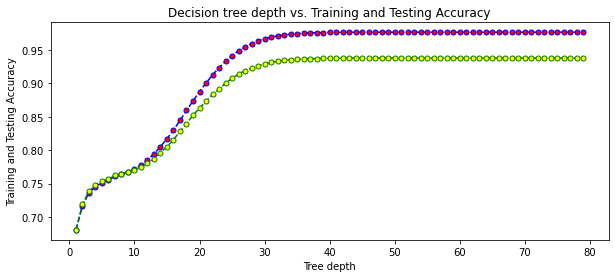

In [49]:
plt.figure(figsize=(10,4))
plt.plot(range(1,80), training_score, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.plot(range(1,80), testing_score, color='green', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=5)
plt.title('Decision tree depth vs. Training and Testing Accuracy')
plt.xlabel('Tree depth')
plt.ylabel('Training and Testing Accuracy')

In [50]:
dec_tree48 = DecisionTreeClassifier(max_depth=48, random_state=42)
dec_tree48.fit(Xd_train,yd_train)

DecisionTreeClassifier(max_depth=48, random_state=42)

In [51]:
train_accuracy48 = dec_tree48.score(Xd_train, yd_train)
test_accuracy48 = dec_tree48.score(Xd_test, yd_test)
print('Accuracy in Train set for depth=48   : {:.2f}'.format(train_accuracy48), 
      'Accuracy in Test  set for depth=48   : {:.2f}'.format(test_accuracy48), sep='\n')

Accuracy in Train set for depth=48   : 0.98
Accuracy in Test  set for depth=48   : 0.94


In [52]:
# Random Forest
df3 = df0.drop(['Asthma', 'MentalHealth', 'SleepTime', 'Race', 'AlcoholDrinking'], axis=1)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

Xr = df3.drop(['HeartDisease'], axis=1)
yr = df3['HeartDisease']
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr,yr, test_size=0.2, random_state=42)

param_grid = {
    'max_depth':[33, 36, 39],
    'n_estimators':[250,260,270,280,290,300,310,320,330,340],
    'min_samples_split': [5,8,10,15,20,25,30,35,40,50,60,70]
}

In [ ]:
ran_for_grd_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, verbose=3, cv=3, n_jobs=1)
ran_for_grd_search.fit(Xr_train, yr_train.values.ravel())
ran_for_grd_search.best_params_

In [53]:
#{'max_depth': 39, 'min_samples_split': 5, 'n_estimators': 330}
paran = {'max_depth': 39, 'min_samples_split': 5, 'n_estimators': 330}
ran_for = RandomForestClassifier(random_state=42, **paran)
ran_for.fit(Xr_train, yr_train.values.ravel())

RandomForestClassifier(max_depth=39, min_samples_split=5, n_estimators=330,
                       random_state=42)

In [54]:
print('Random Forest Model Metrics:')
print('==============================')
yr_pred = ran_for.predict(Xr_test)
print('accuracy_score:  ', accuracy_score(y_pred=yr_pred,y_true=yr_test.values.ravel()))
print('precision_score: ', precision_score(y_pred=yr_pred,y_true=yr_test.values.ravel()))
print('recall:          ', recall_score(y_pred=yr_pred,y_true=yr_test.values.ravel()))
print('F1:              ', f1_score(y_pred=yr_pred,y_true=yr_test.values.ravel()))
print('AUC Score :      ', roc_auc_score(y_score=yr_pred,y_true=yr_test.values.ravel()))

Random Forest Model Metrics:
accuracy_score:   0.9377698364523934
precision_score:  0.8980520690940723
recall:           0.9877667481077756
F1:               0.9407753956307717
AUC Score :       0.9377317655665504


In [55]:
print(classification_report(yr_test,yr_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.93     58440
           1       0.90      0.99      0.94     58529

    accuracy                           0.94    116969
   macro avg       0.94      0.94      0.94    116969
weighted avg       0.94      0.94      0.94    116969



Confusion Matrix for Random Forest Model


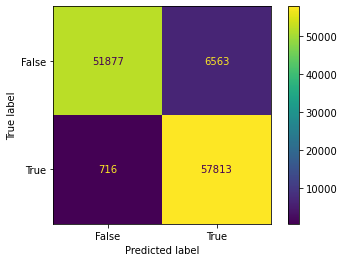

In [56]:
cfr = metrics.confusion_matrix(yr_test.values.ravel(), yr_pred.ravel())
cmr_display = ConfusionMatrixDisplay(confusion_matrix = cfr, display_labels = [False, True])
print('Confusion Matrix for Random Forest Model')
cmr_display.plot()
plt.show()

In [57]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

df4 = df0.drop(['Asthma', 'MentalHealth', 'SleepTime', 'Race', 'AlcoholDrinking'], axis=1)
df4_norm=df4.iloc[:,-1].values
Xk_train, Xk_test, yk_train, yk_test = train_test_split(df4.iloc[:,1:-1],df4_norm,test_size=0.2,random_state=0)

In [58]:
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski')
knn.fit(Xk_train, yk_train.ravel())

KNeighborsClassifier(n_neighbors=10)

In [59]:
train_accuracy = knn.score(Xk_train, yk_train)
test_accuracy = knn.score(Xk_test, yk_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  set   : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy in Train set   : 0.94
Accuracy in Test  set   : 0.93


In [60]:
print('KNN Model Metrics for K=10:')
print('==============================')
yk_pred = knn.predict(Xk_test)
print('accuracy_score:  ', accuracy_score(y_pred=yk_pred,y_true=yk_test.ravel()))
print('precision_score: ', precision_score(y_pred=yk_pred,y_true=yk_test.ravel()))
print('recall:          ', recall_score(y_pred=yk_pred,y_true=yk_test.ravel()))
print('F1:              ', f1_score(y_pred=yk_pred,y_true=yk_test.ravel()))
print('AUC Score :      ', roc_auc_score(y_score=yk_pred,y_true=yk_test.ravel()))

KNN Model Metrics for K=10:
accuracy_score:   0.9271516384683122
precision_score:  0.8002167027837973
recall:           0.6105564387917329
F1:               0.6926378819031129
AUC Score :       0.7934404808632127


In [61]:
cmat = confusion_matrix(yk_test, yk_pred)
print('Misclassification Rate for K=10 : {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

Misclassification Rate for K=10 : 0.07284836153168789


In [62]:
print(classification_report(yk_test,yk_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    101244
           1       0.80      0.61      0.69     15725

    accuracy                           0.93    116969
   macro avg       0.87      0.79      0.83    116969
weighted avg       0.92      0.93      0.92    116969



Confusion Matrix of KNN Model for K=10


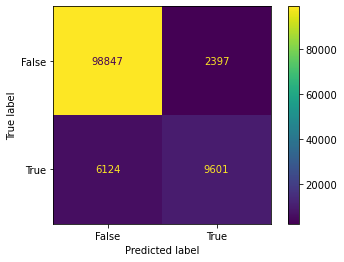

In [63]:
cfk = metrics.confusion_matrix(yk_test.ravel(), yk_pred.ravel())
cmk_display = ConfusionMatrixDisplay(confusion_matrix = cfk, display_labels = [False, True])
print('Confusion Matrix of KNN Model for K=10')
cmk_display.plot()
plt.show()

In [64]:
# Optimize K-Value for better predictions
error_rate = []
for i in range(1,20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xk_train, yk_train)
    pred_i = knn.predict(Xk_test)
    error_rate.append(np.mean(pred_i != yk_test))

Text(0, 0.5, 'Error Rate')

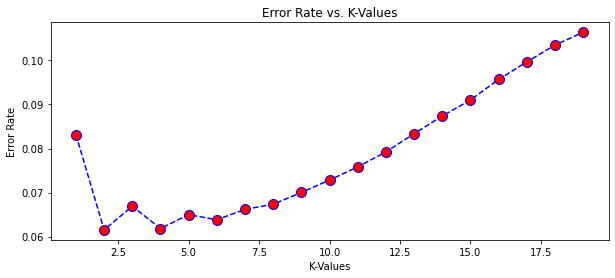

In [65]:
# Plot Error Rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,20), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

In [66]:
# Re-train model using optimal k-value
knn4 = KNeighborsClassifier(n_neighbors=4)
knn4.fit(Xk_train, yk_train)

KNeighborsClassifier(n_neighbors=4)

In [67]:
train_accuracy = knn4.score(Xk_train, yk_train)
test_accuracy = knn4.score(Xk_test, yk_test)
print('Optimized Accuracy in Train set   : {:.2f}'.format(train_accuracy), 
      'Optimized Accuracy in Test  set   : {:.2f}'.format(test_accuracy), sep='\n')

Optimized Accuracy in Train set   : 0.95
Optimized Accuracy in Test  set   : 0.94


In [68]:
print('KNN Model Metrics for Optimized K-value of 4:')
print('==============================================')
yk_pred4 = knn4.predict(Xk_test)
print('accuracy_score:  ', accuracy_score(y_pred=yk_pred4,y_true=yk_test.ravel()))
print('precision_score: ', precision_score(y_pred=yk_pred4,y_true=yk_test.ravel()))
print('recall:          ', recall_score(y_pred=yk_pred4,y_true=yk_test.ravel()))
print('F1:              ', f1_score(y_pred=yk_pred4,y_true=yk_test.ravel()))
print('AUC Score :      ', roc_auc_score(y_score=yk_pred4,y_true=yk_test.ravel()))

KNN Model Metrics for Optimized K-value of 4:
accuracy_score:   0.9381545537706572
precision_score:  0.8594530522394378
recall:           0.6455325914149443
F1:               0.737289366647298
AUC Score :       0.8145682790348792


In [69]:
cmat4 = confusion_matrix(yk_test, yk_pred4)
print('Misclassification Rate for K=4: {}'.format(np.divide(np.sum([cmat4[0,1],cmat4[1,0]]),np.sum(cmat4))))

Misclassification Rate for K=4: 0.061845446229342814


In [70]:
print(classification_report(yk_test,yk_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    101244
           1       0.80      0.61      0.69     15725

    accuracy                           0.93    116969
   macro avg       0.87      0.79      0.83    116969
weighted avg       0.92      0.93      0.92    116969



Confusion Matrix of KNN Model for K=4


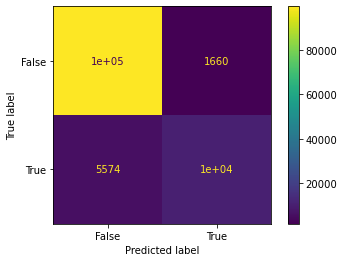

In [71]:
cfk4 = metrics.confusion_matrix(yk_test.ravel(), yk_pred4.ravel())
cmk4_display = ConfusionMatrixDisplay(confusion_matrix = cfk4, display_labels = [False, True])
print('Confusion Matrix of KNN Model for K=4')
cmk4_display.plot()
plt.show()

In [72]:
# Save Decision Tree model
filename22 = 'decision_tree_model.joblib'
joblib.dump(dec_tree, filename22)

['decision_tree_model.joblib']